# Data
[wine+quality](https://archive.ics.uci.edu/dataset/186/wine+quality)
  
  Input variables (based on physicochemical tests):
   - 1 - fixed acidity
   - 2 - volatile acidity
   - 3 - citric acid
   - 4 - residual sugar
   - 5 - chlorides
   - 6 - free sulfur dioxide
   - 7 - total sulfur dioxide
   - 8 - density
   - 9 - pH
   - 10 - sulphates
   - 11 - alcohol

Output variable (based on sensory data):
   - 12 - quality (score between 0 and 10)

// TODO - визуализировать с помощью метода главных компонент

// TODO - нормализовать входные данные

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

wine_data_url_white = 'gdrive/My Drive/Colab Notebooks/hybrid-intelligent-systems/winequality-white.csv'
wine_data_url_red = 'gdrive/My Drive/Colab Notebooks/hybrid-intelligent-systems/winequality-red.csv'

wine_df_white_raw = pd.read_csv(wine_data_url_white, sep=';')
wine_df_red_raw = pd.read_csv(wine_data_url_red, sep=';')

Mounted at /content/gdrive


In [2]:
from sklearn import preprocessing

col_names = wine_df_white_raw.columns
scaler = preprocessing.MinMaxScaler()

white_normalized_data = scaler.fit_transform(wine_df_white_raw)
red_normalized_data = scaler.fit_transform(wine_df_red_raw)

wine_df_white = pd.DataFrame(white_normalized_data, columns=col_names)
wine_df_red = pd.DataFrame(red_normalized_data, columns=col_names)

In [3]:
wine_df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.500000
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.500000
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.500000
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,0.500000
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,0.333333
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,0.500000
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,0.666667


In [4]:
wine_df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


In [5]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering().fit(wine_df_white)
clustering.labels_

array([0, 0, 0, ..., 0, 1, 1])

In [6]:
a = np.array(clustering.labels_)
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 3077, 1: 1821}

# Custom GridSearch

In [7]:
import gc
gc.collect()

def Custom_GridSearch(estimator, param_grid, scoring, data):
  scores_and_params = [] # pairs (step_score, step_estimator)

  # Cartesian product may be computed by --itertools.product--
  param_names = list(param_grid.keys())
  params_combinations = [(x,) for x in param_grid[param_names[0]]] # lists of params typles [(p1,p2,p3), (p1,p2,p3')...] with initial
  temp_params_combinations = [] # same with above, for service use
  keys_count = len(param_grid)

  for param_key_index in range(1, keys_count): # starts with second, we already have first param tuples as initial
    temp_params_combinations = list(params_combinations) # save
    params_combinations.clear()
    for param_value in param_grid[param_names[param_key_index]]:
      for param_tuple in temp_params_combinations:
        params_combinations.append((*param_tuple, param_value))

  del temp_params_combinations
  gc.collect()

  # now in params_combinations we have Cartesian product of params
  # order of params same with keys order
  params_count = len(param_names)
  for prms_comb in params_combinations:
    step_params = {}
    for param_index in range(0, params_count):
      step_params[param_names[param_index]] = prms_comb[param_index]
    step_estimator = estimator(**step_params)
    step_estimator.fit(data)
    step_score = scoring(data, step_estimator.labels_)
    score = (step_score, step_estimator)
    scores_and_params.append(score)

  return scores_and_params

In [8]:
from sklearn.metrics import silhouette_score

data = wine_df_white

max_clusters = int(len(data) / 2)

params = {
    'n_clusters': range(2, 10),
    'linkage': ['average', 'complete', 'single'],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
}

clustering_gs_result = Custom_GridSearch(
    estimator = AgglomerativeClustering,
    param_grid = params,
    scoring = silhouette_score,
    data = data
)

# Best estimator visualization

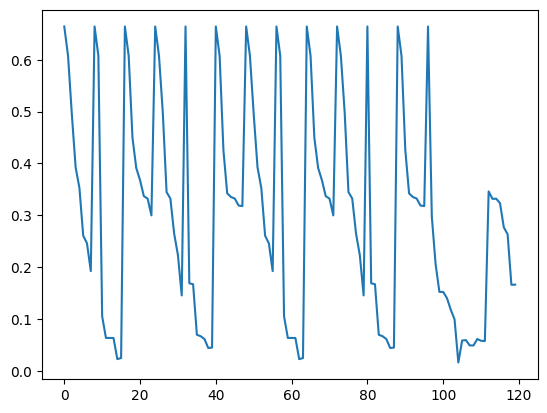

In [9]:
import matplotlib.pyplot as plt

optimization_results = [pair[0] for pair in clustering_gs_result]

plt.plot(list(range(len(optimization_results))), optimization_results)
plt.show()

In [10]:
optimization_results_sort = sorted(clustering_gs_result, key=lambda gs: gs[0], reverse=True)
best_estimator = optimization_results_sort[0][1]

print(best_estimator.n_clusters_)
print(best_estimator.linkage)
print(best_estimator.metric)

2
average
euclidean


In [11]:
optimization_results_sort[0:20]

[(0.6642647103023622,
  AgglomerativeClustering(linkage='average', metric='euclidean')),
 (0.6642647103023622,
  AgglomerativeClustering(linkage='complete', metric='euclidean')),
 (0.6642647103023622,
  AgglomerativeClustering(linkage='single', metric='euclidean')),
 (0.6642647103023622, AgglomerativeClustering(linkage='average', metric='l1')),
 (0.6642647103023622,
  AgglomerativeClustering(linkage='complete', metric='l1')),
 (0.6642647103023622, AgglomerativeClustering(linkage='single', metric='l1')),
 (0.6642647103023622, AgglomerativeClustering(linkage='average', metric='l2')),
 (0.6642647103023622,
  AgglomerativeClustering(linkage='complete', metric='l2')),
 (0.6642647103023622, AgglomerativeClustering(linkage='single', metric='l2')),
 (0.6642647103023622,
  AgglomerativeClustering(linkage='average', metric='manhattan')),
 (0.6642647103023622,
  AgglomerativeClustering(linkage='complete', metric='manhattan')),
 (0.6642647103023622,
  AgglomerativeClustering(linkage='single', metr

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from matplotlib import pyplot as plt

In [13]:
_dendrogram = linkage(data, method='average', metric='euclidean')

In [14]:
cutree = cut_tree(_dendrogram, n_clusters=2)

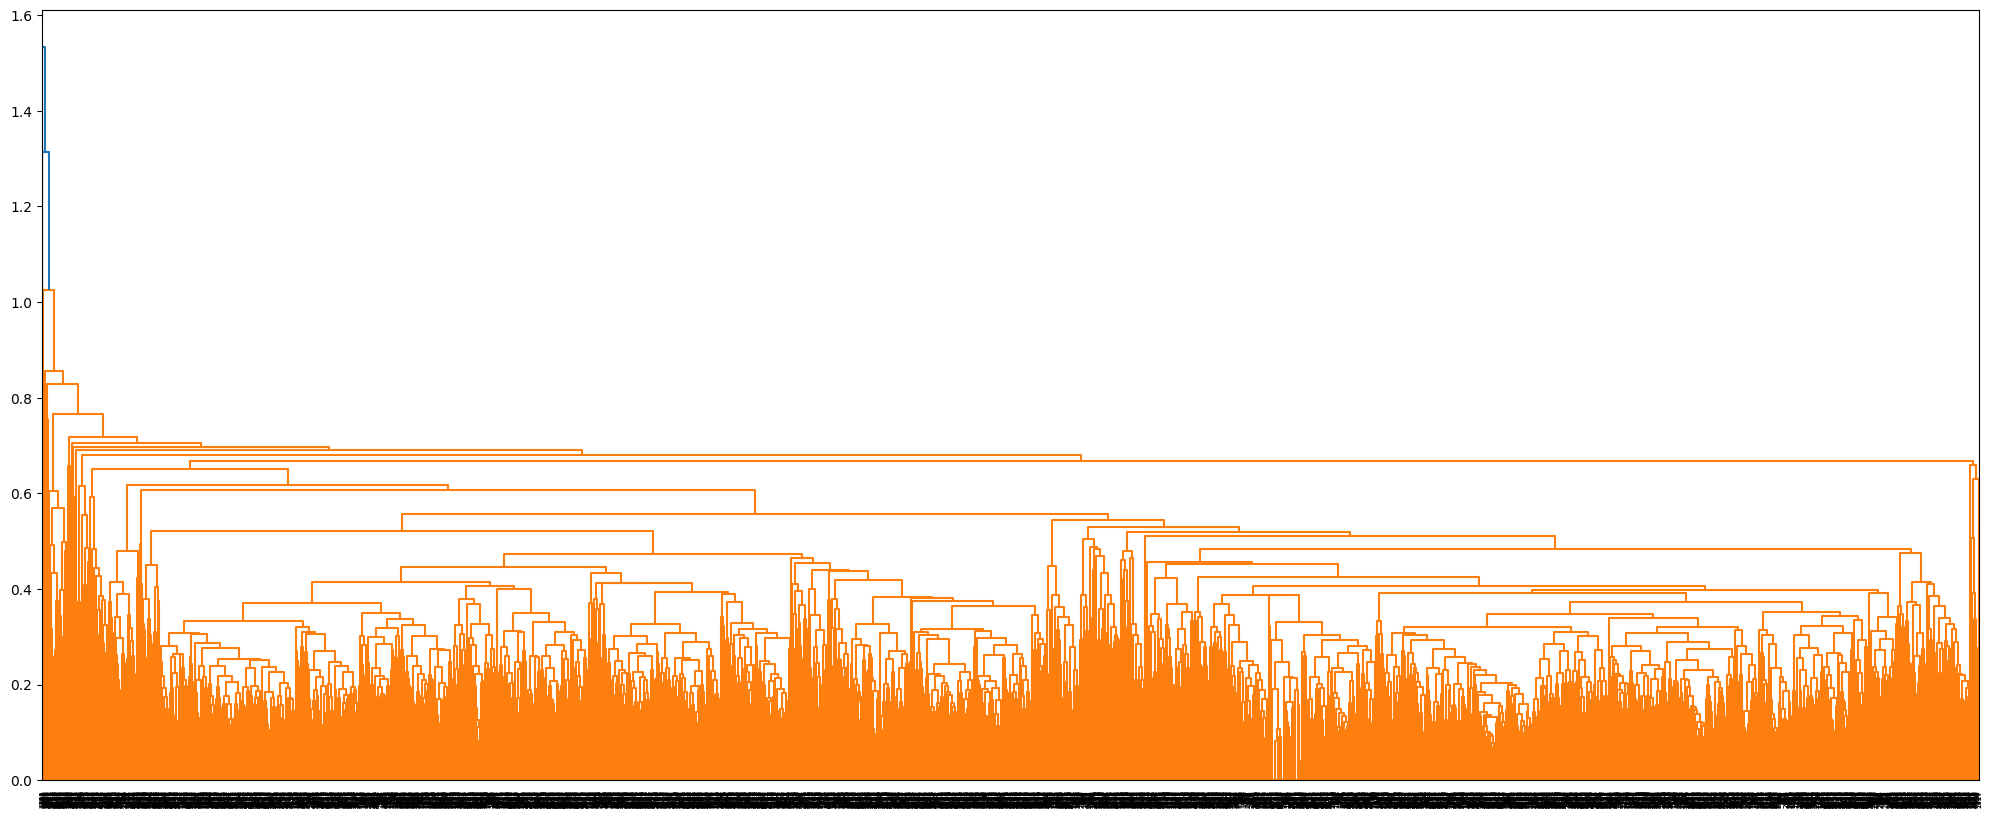

In [15]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(_dendrogram)
plt.show()

# ontology
[docs](https://owlready2.readthedocs.io/en/v0.42/class.html#querying-individual-relations)

In [16]:
best_estimator.children_

array([[   0,    7],
       [   1,    8],
       [   2,    5],
       ...,
       [9769, 9791],
       [4745, 9792],
       [2781, 9793]])

In [17]:
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077270 sha256=638c84d4b4bec2c1c798a6a453bdb328fd7a4c2d4a4cace264a2db382bd74cb9
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


In [18]:
from owlready2 import *
import types

In [21]:
onto = get_ontology("http://itmo.ru/his2.okladnikov.owl")
n_samples = len(data)
with onto:
    for i, pair in enumerate(best_estimator.children_):
        # parent
        parent = f'Class_{i+n_samples}'
        parent_ontology_entity = ''
        if not onto[parent]:
            parent_ontology_entity = types.new_class(parent, (Thing,))
        else:
            parent_ontology_entity = onto[parent]
        # child
        for child_idx in pair:
            cls, individ = f'Class_{child_idx}', f'Individ_{child_idx}'
            if child_idx >= n_samples:
                cls_ontology_entity = onto[cls]
                if not cls_ontology_entity:
                    types.new_class(cls, (parent_ontology_entity,))
                else:
                    cls_ontology_entity.is_a.append(parent_ontology_entity)
                    cls_ontology_entity.is_a.remove(Thing)
            else:
                parent_ontology_entity(individ)

onto.save(file = "onto.owl", format = "ntriples")

In [20]:
onto.destroy()